In [1]:
import keras
import numpy as np 
import requests
import datetime
import pandas as pd
import pandas_datareader.data as reader
from sklearn.svm import SVR
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style


style.use('ggplot')
start = datetime.datetime(2018,1,1)
end = datetime.datetime.today()
# start = datetime.datetime(2020,3,11)
# end = datetime.datetime(2020,8,1)
# end = datetime.date.today()
df = reader.DataReader("EBAY", 'yahoo', start, end)
# sort by date
df = df.sort_values('Date')
df = df.sort_values('Date')

# fix the date 
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

def accessGrant():
    stripped = ""
    # adding noise to the data process:
    # data[::5] += 3 * (0.5 - np.random.rand(5))
    # accessfile = open("access.txt","r")
    with open("access.txt","r") as access:
            line = access.readline()
            cnt = 1
            while line:
                if ("finnhub" in line):
                    print(f'Line {cnt}: {line.strip("finnhub=~")}')
                stripped = line.strip("finnhub=~")
                line = access.readline()
                cnt += 1
                if(cnt>2):
                    break

def unixTimeStamp():
    timenow = datetime.datetime.now()
    epoch = datetime.datetime.utcfromtimestamp(0)
    value = (timenow - epoch).total_seconds() * 1000.0
    return(value,timenow)

def genWebHook():
    r = requests.post('https://finnhub.io/api/v1/webhook/add?token=', stripped , json={'event': 'earnings', 'symbol': 'TSLA'})
    res = r.json() # limit 30/sec base
    print(res)

def main():
    utc , _ = unixTimeStamp()
    print(utc)
    print(df.columns)
    # genWebHook()
if __name__ == "__main__":
    main()

# quandl.ApiConfig.api_key = contents
# data = quandl.get('WIKI/TSLA', start_date='2019-12-26', end_date='2020-7-28')
# tsla = quandl.get("EOD/TSLA")
# print(tsla.head())

1598463893514.504
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [2]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,38.360001,37.919998,38.169998,38.060001,6997300.0,37.187477
2018-01-03,39.279999,37.900002,37.990002,39.220001,9134400.0,38.320892
2018-01-04,39.770000,38.470001,39.419998,38.570000,8958600.0,37.685787
2018-01-05,39.840000,38.810001,38.849998,39.689999,7290400.0,38.780113
2018-01-08,40.080002,39.439999,39.549999,39.799999,9714200.0,38.887589
...,...,...,...,...,...,...
2020-08-20,58.060001,57.160000,57.599998,57.660000,6458400.0,57.660000
2020-08-21,59.060001,57.509998,57.860001,58.209999,6784200.0,58.209999
2020-08-24,58.959999,58.060001,58.459999,58.779999,6053100.0,58.779999


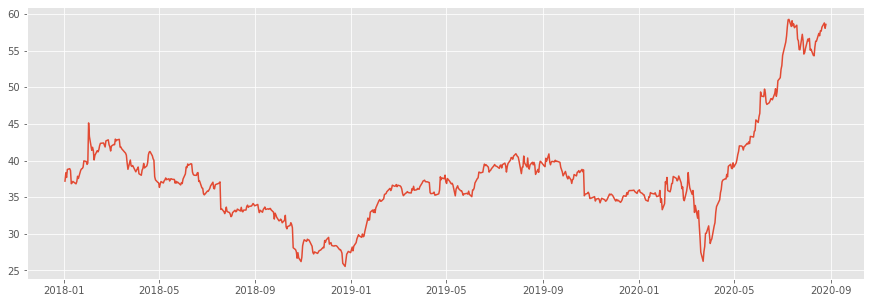

In [3]:
plt.figure(figsize = (15,5))
plt.plot(df["Adj Close"])

In [4]:
storeAdjClose = df['Adj Close']
mavg = storeAdjClose.rolling(window=100).mean()

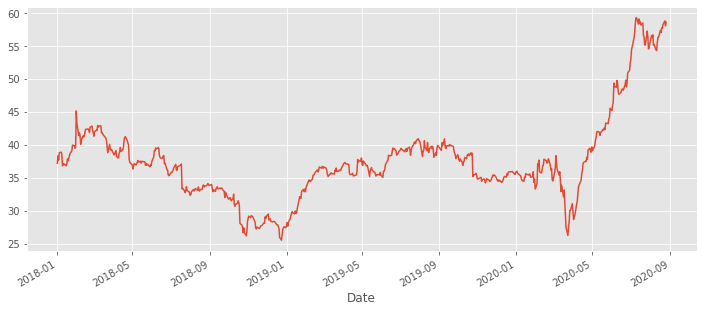

In [5]:
plt.figure(figsize = (12,5))
storeAdjClose.plot()

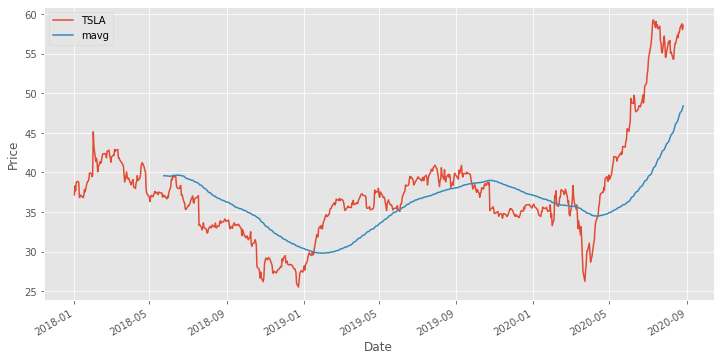

In [6]:
plt.figure(figsize = (12,6))
storeAdjClose.plot(label='TSLA')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [7]:

dates_df = df.copy()
dates_df = dates_df.reset_index()

org_dates = dates_df['Date']

dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates_df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
663,737657.0,58.060001,57.160000,57.599998,57.660000,6458400.0,57.660000
664,737658.0,59.060001,57.509998,57.860001,58.209999,6784200.0,58.209999
665,737661.0,58.959999,58.060001,58.459999,58.779999,6053100.0,58.779999
666,737662.0,58.889999,58.020000,58.509998,58.049999,4982700.0,58.049999
667,737663.0,58.650101,57.380001,57.959999,58.580002,6281936.0,58.580002


/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


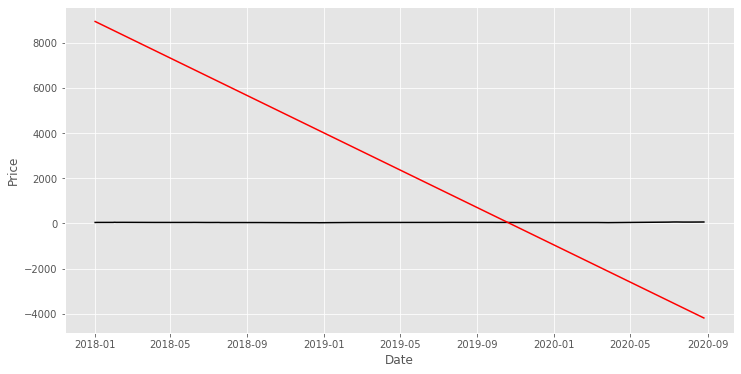

In [8]:
# kernels are used to map lower dimention datapoints to a high dimentional data space
dates = dates_df['Date'].to_numpy()
prices = df['Adj Close'].to_numpy()
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))
svrTickerLinear = SVR(kernel= 'linear')
svrTickerLinear.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTickerLinear.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


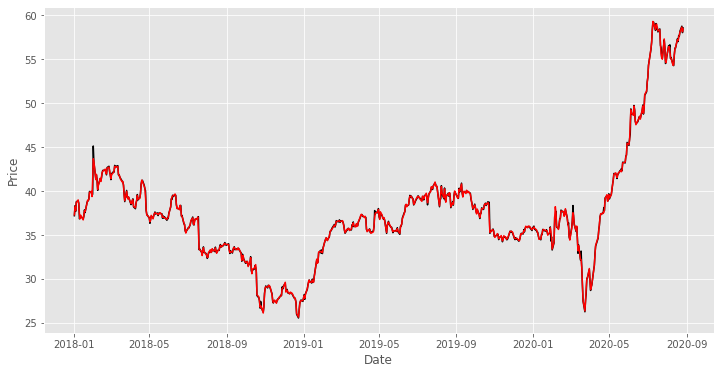

In [9]:
svrTickerRBF = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svrTickerRBF.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTickerRBF.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/Users/shanmukhasurapuraju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


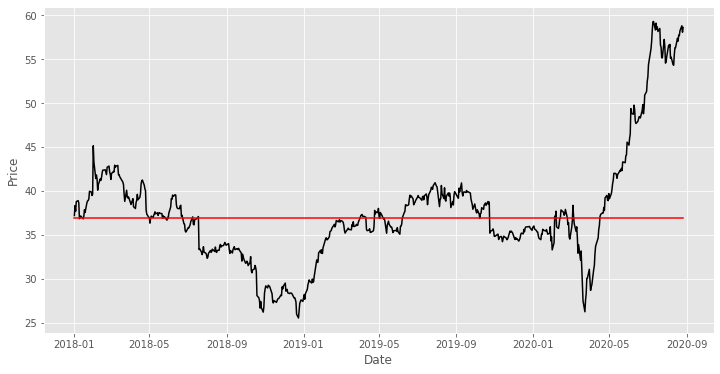

In [10]:
svrTicker = SVR(kernel= 'sigmoid')
svrTicker.fit(dates, prices)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svrTicker.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()